# Necessary Libraries and readings

In [1]:
#importing libraries
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

#avoid warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_link= 'https://drive.google.com/file/d/1cpZwnXj7MJtc7qZ5z6_XB6CHkgzAjbeC/view'
# get the id part of the file
id = file_link.split("/")[-2]
print(id)
# creating a new link using the id for better readability of csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
ds = pd.read_csv(new_link)
num_values_to_delete = int(ds.size * (15 / 100))
print(num_values_to_delete)
print(ds.keys())

1cpZwnXj7MJtc7qZ5z6_XB6CHkgzAjbeC
21780
Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')


In [3]:
ds[:20]

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0          14.0        73         9.5               82.0  partly cloudy   
1          39.0        96         8.5               71.0  partly cloudy   
2          30.0        64         7.0               16.0          clear   
3          38.0        83         1.5               82.0          clear   
4          27.0        74        17.0               66.0       overcast   
5          32.0        55         3.5               26.0       overcast   
6          -2.0        97         8.0               86.0       overcast   
7           3.0        85         6.0               96.0  partly cloudy   
8           3.0        83         6.0               66.0       overcast   
9          28.0        74         8.5              107.0          clear   
10         35.0        45         6.0               86.0  partly cloudy   
11         38.0        43         2.0               16.0          clear   
12         12.0        59        10.5               25.0  partly cloudy   
13        -10.0        87        15.0               67.0       overcast   
14         24.0        21         3.5                8.0          clear   
15         10.0        50         6.5               46.0  partly cloudy   
16         30.0        27         7.0               13.0  partly cloudy   
17         33.0        51         0.5               27.0       overcast   
18         43.0        46         0.5               15.0          clear   
19         13.0       102        12.0               72.0          clear   

    Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0                1010.82         2  Winter              3.5    inland   
1                1011.43         7  Spring             10.0    inland   
2                1018.72         5  Spring              5.5  mountain   
3                1026.25         7  Spring              1.0   coastal   
4                 990.67         1  Winter              2.5  mountain   
5                1010.03         2  Summer              5.0    inland   
6                 990.87         1  Winter              4.0    inland   
7                 984.46         1  Winter              3.5    inland   
8                 999.44         0  Winter              1.0  mountain   
9                1012.13         8  Winter              7.5   coastal   
10                879.88         2  Spring              1.0  mountain   
11               1029.16        11  Autumn              7.5    inland   
12               1016.08         3  Autumn              5.5  mountain   
13                986.19         0  Winter              1.5    inland   
14               1018.88         8  Winter              5.5   coastal   
15               1000.44         2  Summer              8.5  mountain   
16               1016.38         5  Spring              7.5    inland   
17               1009.18         3  Autumn              5.5   coastal   
18               1025.80         9  Spring              6.0  mountain   
19               1012.25         4  Summer              8.0    inland   

   Weather Type  
0         Rainy  
1        Cloudy  
2         Sunny  
3         Sunny  
4         Rainy  
5        Cloudy  
6         Snowy  
7         Snowy  
8         Snowy  
9         Sunny  
10       Cloudy  
11        Sunny  
12       Cloudy  
13        Snowy  
14        Sunny  
15       Cloudy  
16        Sunny  
17       Cloudy  
18        Sunny  
19        Sunny

# Random data deletion and representation

In [4]:
def randomly_delete_values(ds, delete_percentage=10, seed=None):
    np.random.seed(seed)
    edit_ds=ds.copy()
    print(f"size: {edit_ds.size}\nrows: {len(edit_ds)}\ncolumns: {len(edit_ds.columns)}.")
    num_values_to_delete=int(edit_ds.size * (delete_percentage / 100))
    print(f"Randomly deleting {num_values_to_delete} values ({delete_percentage}%) from the dataset.")
    all_indices=[(row, col) for row in range(len(edit_ds)) for col in range(len(edit_ds.columns))]
    indices_to_delete=np.random.choice(len(all_indices), size=num_values_to_delete, replace=False)
    for index in indices_to_delete:
        row, col=all_indices[index]
        edit_ds.iat[row, col]=np.nan
    return edit_ds

processed_ds = randomly_delete_values(ds, 5, 10)

size: 145200
rows: 13200
columns: 11.
Randomly deleting 7260 values (5%) from the dataset.


In [5]:
processed_ds[:30]

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0          14.0       NaN         9.5               82.0  partly cloudy   
1          39.0      96.0         8.5               71.0  partly cloudy   
2          30.0      64.0         7.0               16.0          clear   
3          38.0      83.0         1.5               82.0          clear   
4          27.0      74.0        17.0               66.0       overcast   
5          32.0      55.0         NaN               26.0       overcast   
6          -2.0      97.0         8.0               86.0       overcast   
7           3.0       NaN         6.0               96.0  partly cloudy   
8           3.0      83.0         6.0                NaN       overcast   
9          28.0      74.0         8.5              107.0          clear   
10         35.0      45.0         6.0               86.0  partly cloudy   
11         38.0      43.0         2.0               16.0          clear   
12         12.0      59.0        10.5               25.0            NaN   
13        -10.0      87.0        15.0               67.0       overcast   
14         24.0       NaN         3.5                8.0          clear   
15         10.0      50.0         6.5               46.0  partly cloudy   
16         30.0      27.0         7.0               13.0  partly cloudy   
17         33.0      51.0         NaN                NaN       overcast   
18         43.0      46.0         0.5               15.0          clear   
19         13.0     102.0        12.0               72.0          clear   
20        -10.0      67.0         8.5               75.0       overcast   
21         -7.0      88.0        12.5               98.0       overcast   
22         33.0      36.0         7.5               18.0          clear   
23         26.0      73.0        13.5               29.0            NaN   
24         38.0      83.0         7.0              101.0  partly cloudy   
25          4.0      79.0         1.0               85.0  partly cloudy   
26         17.0      72.0         7.5               62.0       overcast   
27         40.0      57.0         4.0               12.0  partly cloudy   
28         24.0       NaN         NaN                3.0  partly cloudy   
29         30.0      70.0        16.0               54.0  partly cloudy   

    Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0                1010.82       2.0  Winter              NaN    inland   
1                1011.43       NaN  Spring             10.0    inland   
2                1018.72       5.0  Spring              5.5  mountain   
3                1026.25       NaN  Spring              1.0   coastal   
4                 990.67       1.0  Winter              2.5  mountain   
5                1010.03       2.0  Summer              5.0    inland   
6                 990.87       1.0  Winter              4.0    inland   
7                 984.46       1.0  Winter              3.5    inland   
8                 999.44       0.0  Winter              1.0  mountain   
9                1012.13       NaN  Winter              7.5   coastal   
10                   NaN       2.0     NaN              1.0  mountain   
11               1029.16      11.0  Autumn              7.5    inland   
12               1016.08       3.0  Autumn              5.5  mountain   
13                986.19       0.0  Winter              1.5    inland   
14               1018.88       8.0  Winter              5.5   coastal   
15               1000.44       2.0  Summer              8.5  mountain   
16               1016.38       5.0  Spring              7.5    inland   
17               1009.18       3.0  Autumn              5.5   coastal   
18               1025.80       9.0     NaN              6.0  mountain   
19               1012.25       4.0  Summer              8.0    inland   
20                991.53       1.0  Winter              3.0  mountain   
21                980.31       1.0  Winter              3.0       NaN   

In [6]:
#check rows and columns
processed_ds.shape

(13200, 11)

In [7]:
#checking null values
print(processed_ds.isnull().sum())


Temperature             641
Humidity                704
Wind Speed              681
Precipitation (%)       641
Cloud Cover             674
Atmospheric Pressure    659
UV Index                646
Season                  632
Visibility (km)         637
Location                664
Weather Type            681
dtype: int64


In [8]:
processed_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           12559 non-null  float64
 1   Humidity              12496 non-null  float64
 2   Wind Speed            12519 non-null  float64
 3   Precipitation (%)     12559 non-null  float64
 4   Cloud Cover           12526 non-null  object 
 5   Atmospheric Pressure  12541 non-null  float64
 6   UV Index              12554 non-null  float64
 7   Season                12568 non-null  object 
 8   Visibility (km)       12563 non-null  float64
 9   Location              12536 non-null  object 
 10  Weather Type          12519 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.1+ MB


In [9]:
processed_ds.describe(include='all')

Temperature      Humidity    Wind Speed  Precipitation (%)  \
count   12559.000000  12496.000000  12519.000000       12559.000000   
unique           NaN           NaN           NaN                NaN   
top              NaN           NaN           NaN                NaN   
freq             NaN           NaN           NaN                NaN   
mean       19.160443     68.750720      9.830258          53.687316   
std        17.386672     20.173708      6.882985          31.960617   
min       -25.000000     20.000000      0.000000           0.000000   
25%         4.000000     57.000000      5.000000          20.000000   
50%        21.000000     70.000000      9.000000          58.000000   
75%        31.000000     84.000000     13.500000          82.000000   
max       109.000000    109.000000     48.500000         109.000000   

       Cloud Cover  Atmospheric Pressure      UV Index  Season  \
count        12526          12541.000000  12554.000000   12568   
unique           4                   NaN           NaN       4   
top       overcast                   NaN           NaN  Winter   
freq          5774                   NaN           NaN    5343   
mean           NaN           1005.988567      4.015533     NaN   
std            NaN             37.093587      3.861643     NaN   
min            NaN            800.120000      0.000000     NaN   
25%            NaN            994.870000      1.000000     NaN   
50%            NaN           1007.630000      3.000000     NaN   
75%            NaN           1016.780000      7.000000     NaN   
max            NaN           1199.210000     14.000000     NaN   

        Visibility (km) Location Weather Type  
count      12563.000000    12536        12519  
unique              NaN        3            4  
top                 NaN   inland       Cloudy  
freq                NaN     4593         3148  
mean           5.456579      NaN          NaN  
std            3.364464      NaN          NaN  
min            0.000000      NaN          NaN  
25%            3.000000      NaN          NaN  
50%            5.000000      NaN          NaN  
75%            7.500000      NaN          NaN  
max           20.000000      NaN          NaN

In [10]:
processed_ds.nunique()

Temperature              125
Humidity                  90
Wind Speed                96
Precipitation (%)        110
Cloud Cover                4
Atmospheric Pressure    5356
UV Index                  15
Season                     4
Visibility (km)           41
Location                   3
Weather Type               4
dtype: int64

In [11]:
#check categorical and numerical
cat_cols=processed_ds.select_dtypes(include=['object']).columns.tolist()
num_cols = processed_ds.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Cloud Cover', 'Season', 'Location', 'Weather Type']
Numerical Variables:
['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']


# Data Pre-Processing

In [12]:
processed_ds = processed_ds.drop_duplicates()
processed_ds

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0             14.0       NaN         9.5               82.0  partly cloudy   
1             39.0      96.0         8.5               71.0  partly cloudy   
2             30.0      64.0         7.0               16.0          clear   
3             38.0      83.0         1.5               82.0          clear   
4             27.0      74.0        17.0               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195         10.0      74.0        14.5               71.0       overcast   
13196         -1.0      76.0         3.5               23.0         cloudy   
13197         30.0      77.0         5.5               28.0       overcast   
13198          3.0      76.0        10.0               94.0       overcast   
13199         -5.0       NaN         0.0               92.0       overcast   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0                   1010.82       2.0  Winter              NaN    inland   
1                   1011.43       NaN  Spring             10.0    inland   
2                   1018.72       5.0  Spring              5.5  mountain   
3                   1026.25       NaN  Spring              1.0   coastal   
4                    990.67       1.0  Winter              2.5  mountain   
...                     ...       ...     ...              ...       ...   
13195               1003.15       1.0  Summer              1.0       NaN   
13196               1067.23       1.0  Winter              6.0   coastal   
13197               1012.69       3.0  Autumn              9.0   coastal   
13198                984.27       0.0  Winter              2.0    inland   
13199               1015.37       5.0  Autumn             10.0  mountain   

      Weather Type  
0            Rainy  
1           Cloudy  
2            Sunny  
3            Sunny  
4            Rainy  
...            ...  
13195        Rainy  
13196          NaN  
13197       Cloudy  
13198        Snowy  
13199        Rainy  

[13200 rows x 11 columns]

In [13]:
# Fill missing values in numerical features with column's mean value
processed_ds['Humidity'].fillna(processed_ds['Humidity'].mean(), inplace=True)
processed_ds['Temperature'].fillna(processed_ds['Temperature'].mean(), inplace=True)
processed_ds['Wind Speed'].fillna(processed_ds['Wind Speed'].mean(), inplace=True)
processed_ds['Precipitation (%)'].fillna(processed_ds['Precipitation (%)'].mean(), inplace=True)
processed_ds['Atmospheric Pressure'].fillna(processed_ds['Atmospheric Pressure'].mean(), inplace=True)
processed_ds['UV Index'].fillna(processed_ds['UV Index'].mean(), inplace=True)
processed_ds['Visibility (km)'].fillna(processed_ds['Visibility (km)'].mean(), inplace=True)


processed_ds

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0             14.0  68.75072         9.5               82.0  partly cloudy   
1             39.0  96.00000         8.5               71.0  partly cloudy   
2             30.0  64.00000         7.0               16.0          clear   
3             38.0  83.00000         1.5               82.0          clear   
4             27.0  74.00000        17.0               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195         10.0  74.00000        14.5               71.0       overcast   
13196         -1.0  76.00000         3.5               23.0         cloudy   
13197         30.0  77.00000         5.5               28.0       overcast   
13198          3.0  76.00000        10.0               94.0       overcast   
13199         -5.0  68.75072         0.0               92.0       overcast   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0                   1010.82  2.000000  Winter         5.456579    inland   
1                   1011.43  4.015533  Spring        10.000000    inland   
2                   1018.72  5.000000  Spring         5.500000  mountain   
3                   1026.25  4.015533  Spring         1.000000   coastal   
4                    990.67  1.000000  Winter         2.500000  mountain   
...                     ...       ...     ...              ...       ...   
13195               1003.15  1.000000  Summer         1.000000       NaN   
13196               1067.23  1.000000  Winter         6.000000   coastal   
13197               1012.69  3.000000  Autumn         9.000000   coastal   
13198                984.27  0.000000  Winter         2.000000    inland   
13199               1015.37  5.000000  Autumn        10.000000  mountain   

      Weather Type  
0            Rainy  
1           Cloudy  
2            Sunny  
3            Sunny  
4            Rainy  
...            ...  
13195        Rainy  
13196          NaN  
13197       Cloudy  
13198        Snowy  
13199        Rainy  

[13200 rows x 11 columns]

In [14]:
processed_ds.isnull().sum()

Temperature               0
Humidity                  0
Wind Speed                0
Precipitation (%)         0
Cloud Cover             674
Atmospheric Pressure      0
UV Index                  0
Season                  632
Visibility (km)           0
Location                664
Weather Type            681
dtype: int64

In [15]:
# filling in categorical values with neighboring values
processed_ds['Cloud Cover']=processed_ds['Cloud Cover'].fillna(method='ffill').fillna(method='bfill')
processed_ds['Season']=processed_ds['Season'].fillna(method='ffill').fillna(method='bfill')
processed_ds['Location']=processed_ds['Location'].fillna(method='ffill').fillna(method='bfill')
processed_ds['Weather Type']=processed_ds['Weather Type'].fillna(method='ffill').fillna(method='bfill')
processed_ds[:30]

Temperature   Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0          14.0   68.75072    9.500000          82.000000  partly cloudy   
1          39.0   96.00000    8.500000          71.000000  partly cloudy   
2          30.0   64.00000    7.000000          16.000000          clear   
3          38.0   83.00000    1.500000          82.000000          clear   
4          27.0   74.00000   17.000000          66.000000       overcast   
5          32.0   55.00000    9.830258          26.000000       overcast   
6          -2.0   97.00000    8.000000          86.000000       overcast   
7           3.0   68.75072    6.000000          96.000000  partly cloudy   
8           3.0   83.00000    6.000000          53.687316       overcast   
9          28.0   74.00000    8.500000         107.000000          clear   
10         35.0   45.00000    6.000000          86.000000  partly cloudy   
11         38.0   43.00000    2.000000          16.000000          clear   
12         12.0   59.00000   10.500000          25.000000          clear   
13        -10.0   87.00000   15.000000          67.000000       overcast   
14         24.0   68.75072    3.500000           8.000000          clear   
15         10.0   50.00000    6.500000          46.000000  partly cloudy   
16         30.0   27.00000    7.000000          13.000000  partly cloudy   
17         33.0   51.00000    9.830258          53.687316       overcast   
18         43.0   46.00000    0.500000          15.000000          clear   
19         13.0  102.00000   12.000000          72.000000          clear   
20        -10.0   67.00000    8.500000          75.000000       overcast   
21         -7.0   88.00000   12.500000          98.000000       overcast   
22         33.0   36.00000    7.500000          18.000000          clear   
23         26.0   73.00000   13.500000          29.000000          clear   
24         38.0   83.00000    7.000000         101.000000  partly cloudy   
25          4.0   79.00000    1.000000          85.000000  partly cloudy   
26         17.0   72.00000    7.500000          62.000000       overcast   
27         40.0   57.00000    4.000000          12.000000  partly cloudy   
28         24.0   68.75072    9.830258           3.000000  partly cloudy   
29         30.0   70.00000   16.000000          54.000000  partly cloudy   

    Atmospheric Pressure   UV Index  Season  Visibility (km)  Location  \
0            1010.820000   2.000000  Winter         5.456579    inland   
1            1011.430000   4.015533  Spring        10.000000    inland   
2            1018.720000   5.000000  Spring         5.500000  mountain   
3            1026.250000   4.015533  Spring         1.000000   coastal   
4             990.670000   1.000000  Winter         2.500000  mountain   
5            1010.030000   2.000000  Summer         5.000000    inland   
6             990.870000   1.000000  Winter         4.000000    inland   
7             984.460000   1.000000  Winter         3.500000    inland   
8             999.440000   0.000000  Winter         1.000000  mountain   
9            1012.130000   4.015533  Winter         7.500000   coastal   
10           1005.988567   2.000000  Winter         1.000000  mountain   
11           1029.160000  11.000000  Autumn         7.500000    inland   
12           1016.080000   3.000000  Autumn         5.500000  mountain   
13            986.190000   0.000000  Winter         1.500000    inland   
14           1018.880000   8.000000  Winter         5.500000   coastal   
15           1000.440000   2.000000  Summer         8.500000  mountain   
16           1016.380000   5.000000  Spring         7.500000    inland   
17           1009.180000   3.000000  Autumn         5.500000   coastal   
18           1025.800000   9.000000  Autumn         6.000000  mountain   
19           1012.250000   4.000000  Summer         8.000000    inland   
20            991.530000   1.000000  Winter         3.000000  mountain   
21            980.3

In [16]:
processed_ds.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

# Dataset Visualization

Weather Type
Cloudy    3317
Snowy     3302
Rainy     3296
Sunny     3285
Name: count, dtype: int64


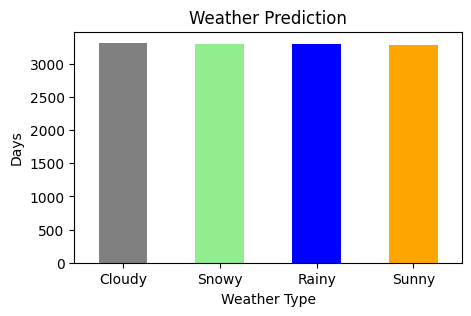

In [17]:
print(processed_ds.value_counts('Weather Type'))
plt.figure(figsize=(5,3))
processed_ds['Weather Type'].value_counts().plot(kind='bar', color=['grey', 'lightgreen', 'blue', 'orange'])
plt.title('Weather Prediction')
plt.xlabel('Weather Type')
plt.ylabel('Days')
plt.xticks(rotation = 0)
plt.show()

<Figure size 800x600 with 0 Axes>

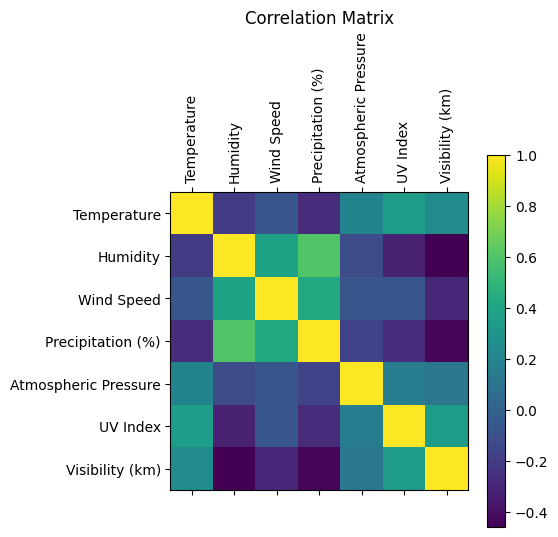

In [18]:
# Correlation matrix plot
plt.figure(figsize=(8, 6))
correlation_matrix = processed_ds.corr(numeric_only=True)
plt.matshow(correlation_matrix)
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()

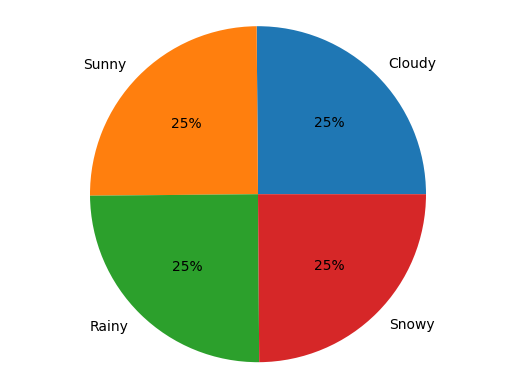

In [19]:
# Pie chart
w,x,y,z=processed_ds['Weather Type'].value_counts()

classes=[w,x,y,z]
class_labels=["Cloudy","Sunny","Rainy","Snowy"]
plt.pie(classes,labels=class_labels,autopct='%0.0f%%')
plt.axis("equal")
plt.show()

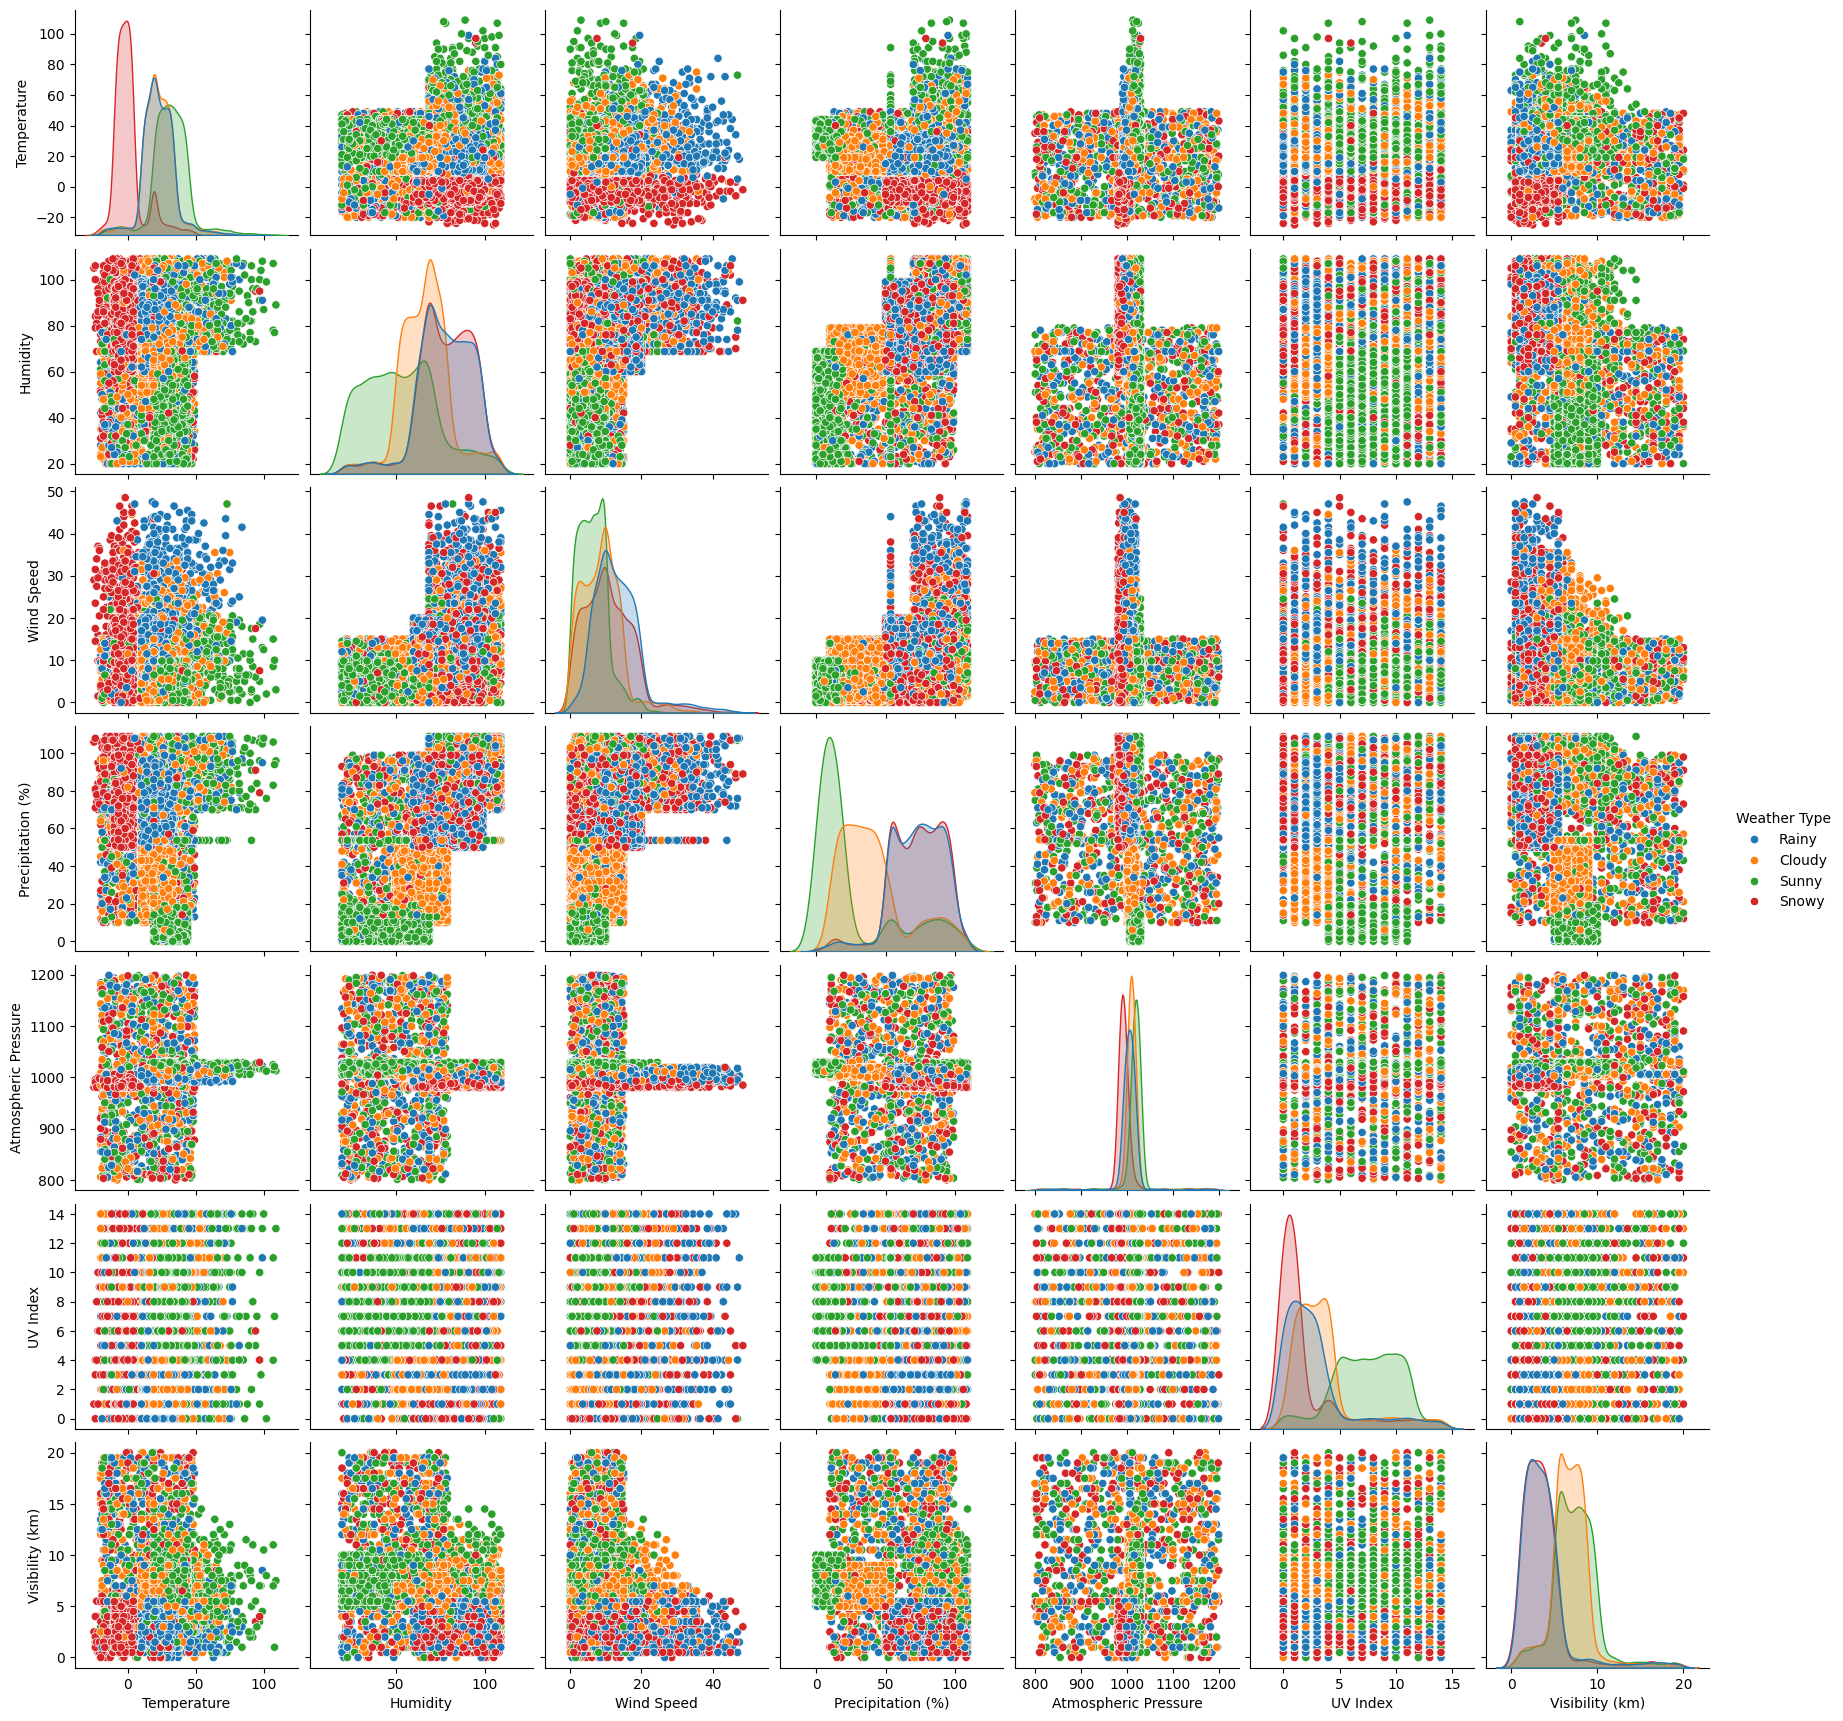

In [20]:
# scatter plot
seaborn.pairplot(processed_ds, hue='Weather Type')

#MODELS


# Implementing Decision Tree, Random Forest, Logistic Regression, K-Nearest Neighbors and Naive Bayes Using Scikit-learn Library


In [21]:
# Split the data into 70-30 train-test split

X = processed_ds.drop(['Weather Type'], axis=1)#features
y = processed_ds['Weather Type']#target column

categorical_features = ['Season', 'Location', 'Cloud Cover']  # Add any other categorical features
X = pd.get_dummies(X, columns=categorical_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# display the shapes
labels=processed_ds['Weather Type'].unique()
print(labels)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

['Rainy' 'Cloudy' 'Sunny' 'Snowy']
X_train shape: (9240, 18)
X_test shape: (3960, 18)
y_train shape: (9240,)
y_test shape: (3960,)


Decision Tree Classifier Accuracy: 0.8573232323232324
---------- Precision and Accuracy ----------
Decision Tree Classifier Precision: 0.8588677910229456
Decision Tree Classifier Recall: 0.8573232323232324
Decision Tree Classifier Accuracy with MinMax Scaler: 0.8570707070707071
Decision Tree Classifier Accuracy with Z-Score Normalization: 0.8575757575757575
Decision Tree Classifier Accuracy with Robust Scaler: 0.8570707070707071


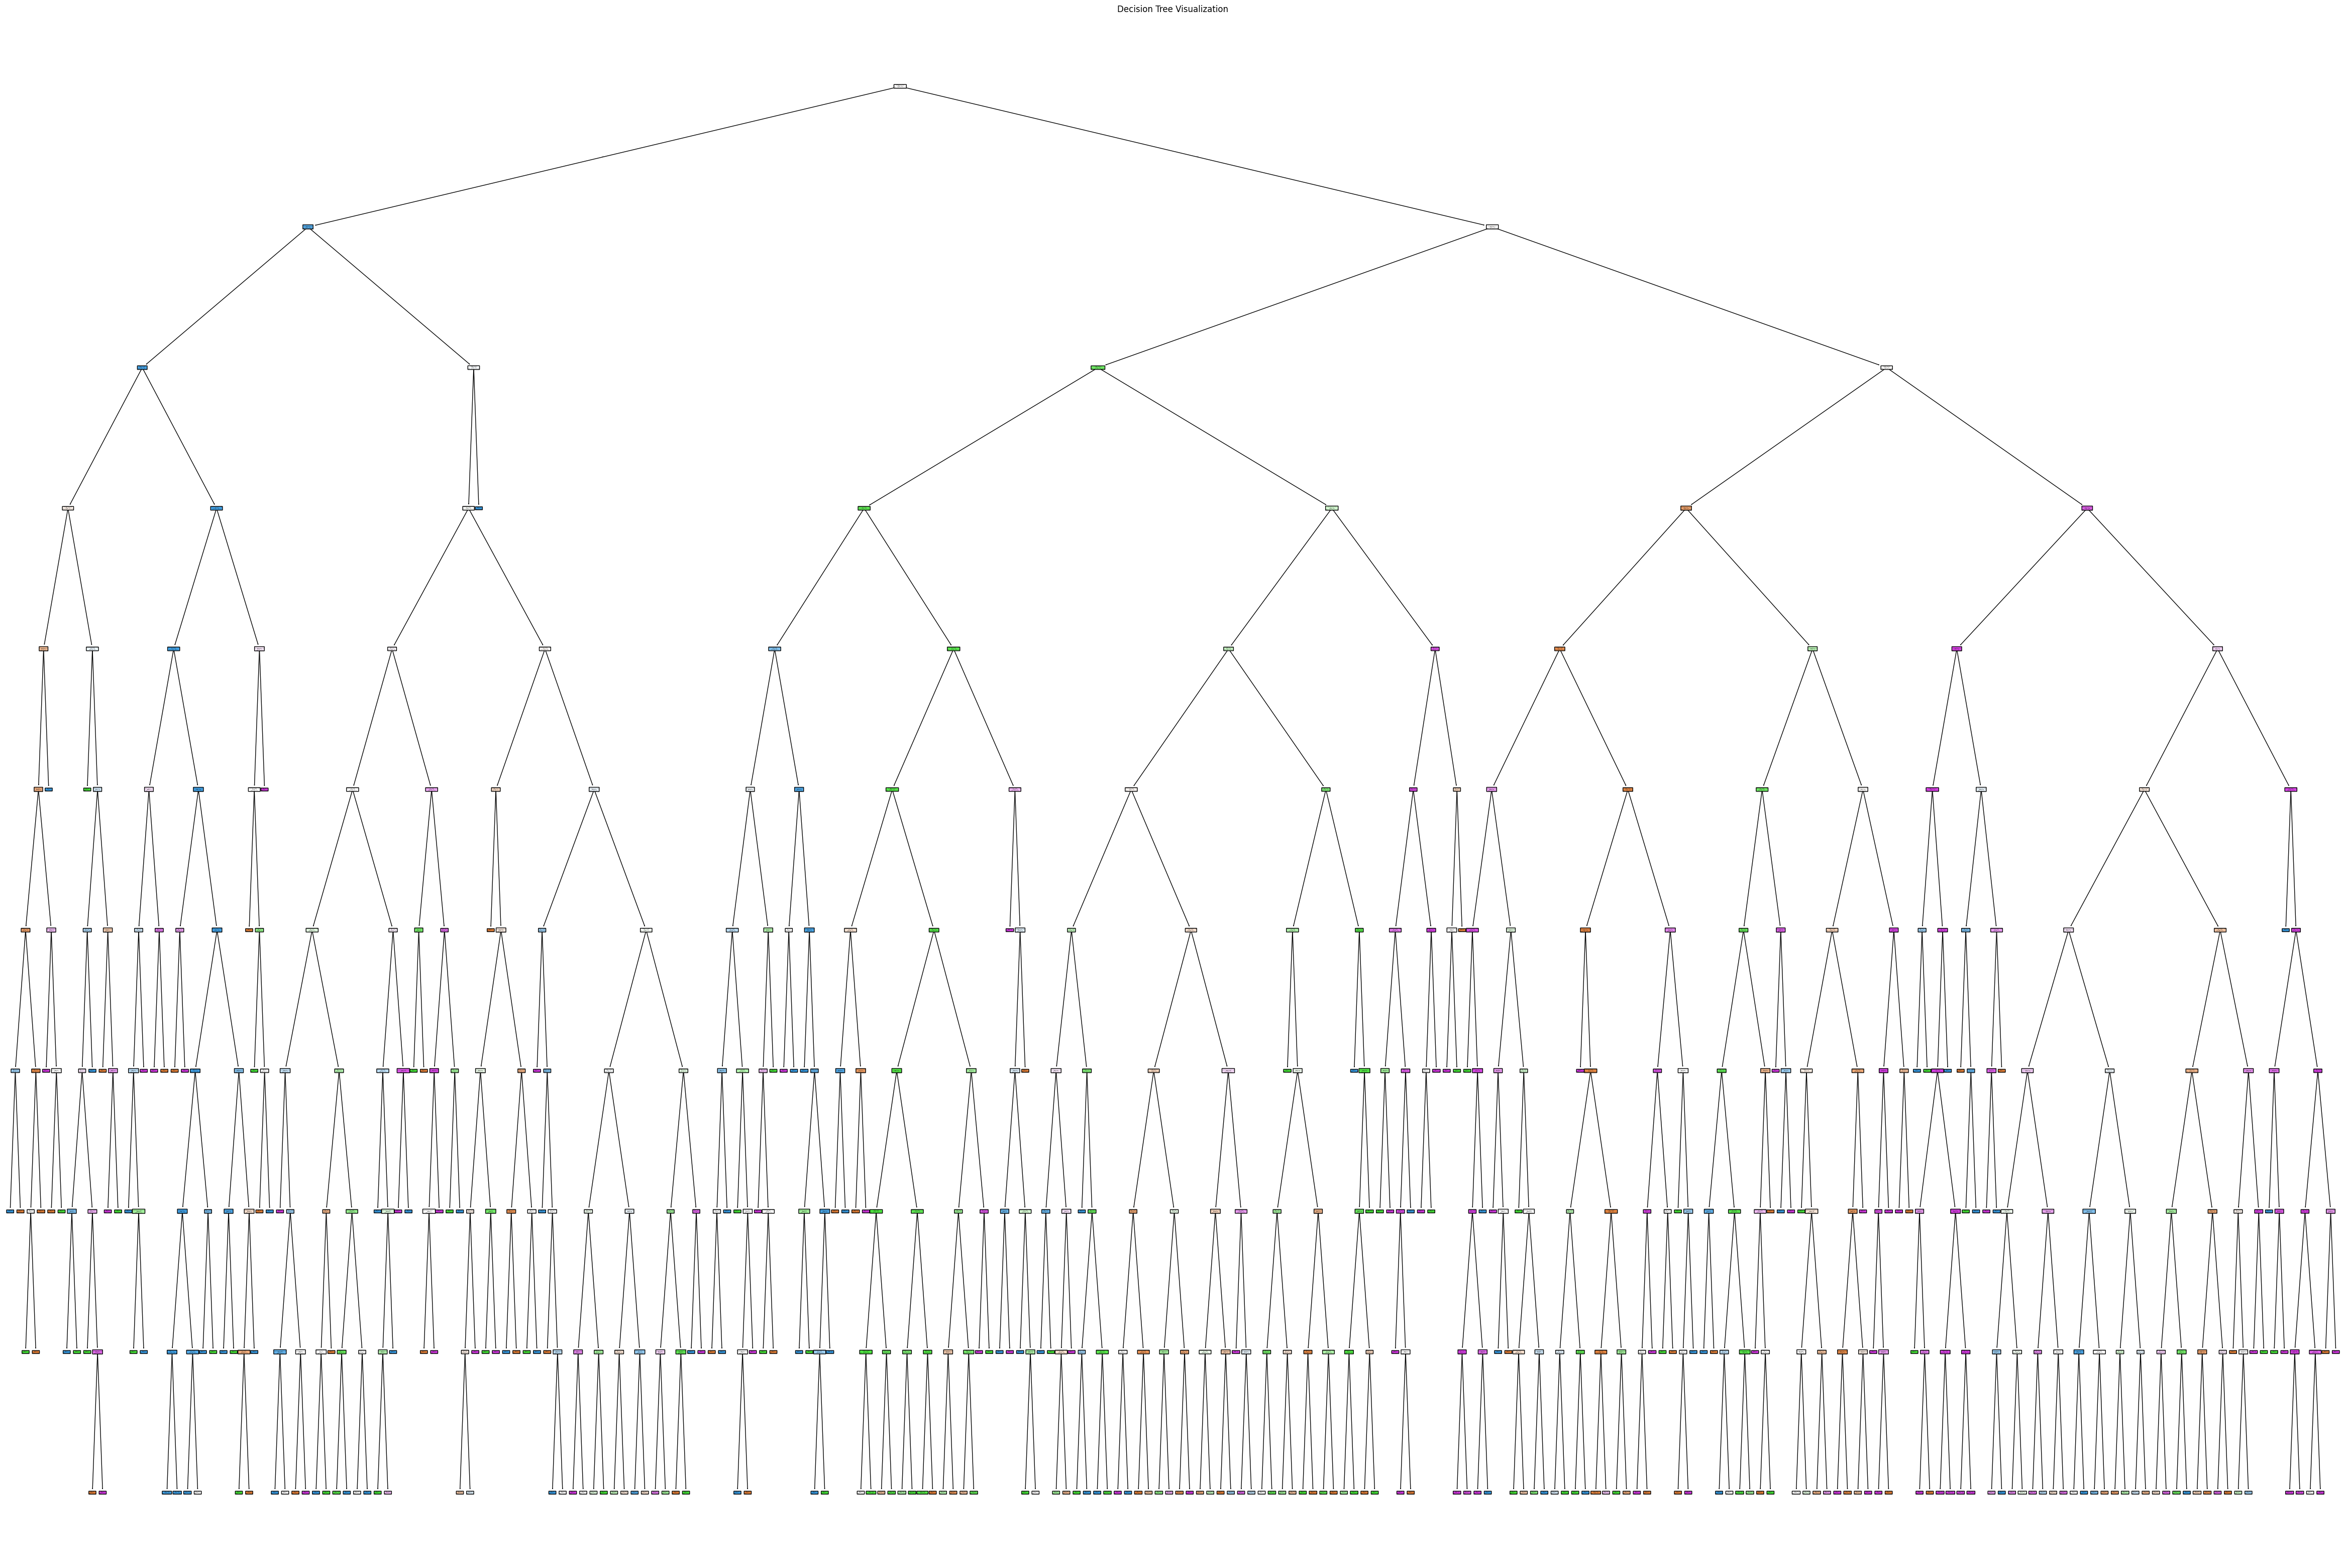

In [23]:
# Implementing Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth = 10, random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dt))
precision=precision_score(y_test,y_pred_dt,average='weighted')
recall=recall_score(y_test,y_pred_dt,average='weighted')
print('-'*10,'Precision and Accuracy','-'*10)
print(f"Decision Tree Classifier Precision: {precision}")
print(f"Decision Tree Classifier Recall: {recall}")

# Implement MinMax Scaler
minmax=MinMaxScaler()
X_train_minmax=minmax.fit_transform(X_train)
X_test_minmax=minmax.transform(X_test)

decision_tree_model.fit(X_train_minmax,y_train)
y_pred_minmax=decision_tree_model.predict(X_test_minmax)
accuracy_minmax=accuracy_score(y_test,y_pred_minmax)
print(f"Decision Tree Classifier Accuracy with MinMax Scaler: {accuracy_minmax}")

# Implement Z-Score Normalization
standard=StandardScaler()
X_train_standard=standard.fit_transform(X_train)
X_test_standard=standard.transform(X_test)

decision_tree_model.fit(X_train_standard, y_train)
y_pred_standard=decision_tree_model.predict(X_test_standard)
accuracy_standard=accuracy_score(y_test, y_pred_standard)
print(f"Decision Tree Classifier Accuracy with Z-Score Normalization: {accuracy_standard}")

# Implement Robust Scaler
robust=RobustScaler()
X_train_robust=robust.fit_transform(X_train)
X_test_robust=robust.transform(X_test)

decision_tree_model.fit(X_train_robust, y_train)
y_pred_robust=decision_tree_model.predict(X_test_robust)
accuracy_robust=accuracy_score(y_test, y_pred_robust)
print(f"Decision Tree Classifier Accuracy with Robust Scaler: {accuracy_robust}")

# Visualize the Decision Tree
plt.figure(figsize=(60, 40))
plot_tree(decision_tree_model, feature_names=X.columns, class_names=['Rainy', 'Cloudy', 'Sunny', 'Snowy'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

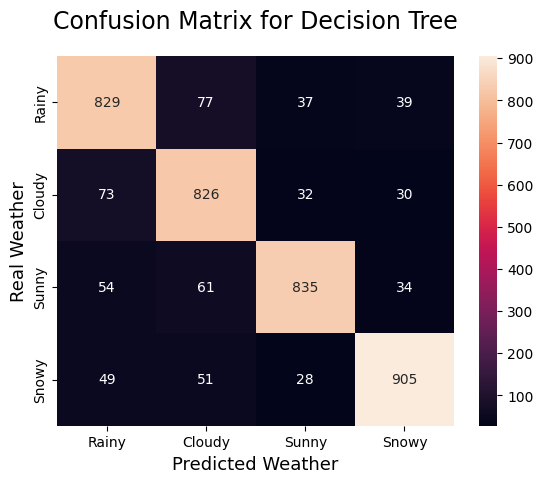

In [24]:
# Confusion Matrix for Decision Tree
cm=confusion_matrix(y_test, y_pred_dt,labels=labels)
seaborn.heatmap(cm,annot=True,fmt='d', xticklabels=labels,yticklabels=labels)
plt.ylabel('Real Weather', fontsize=13)
plt.xlabel('Predicted Weather', fontsize=13)
plt.title('Confusion Matrix for Decision Tree', fontsize=17, pad=20)


Random Forest Classifier Accuracy: 0.8555555555555555
---------- Precision and Accuracy ----------
Random Forest Classifier Precision: 0.8582089022149171
Random Forest Classifier Recall: 0.8555555555555555
Decision Tree Classifier Accuracy with MinMax Scaler: 0.8555555555555555
Decision Tree Classifier Accuracy with Z-Score Normalization: 0.8555555555555555
Decision Tree Classifier Accuracy with Robust Scaler: 0.8555555555555555


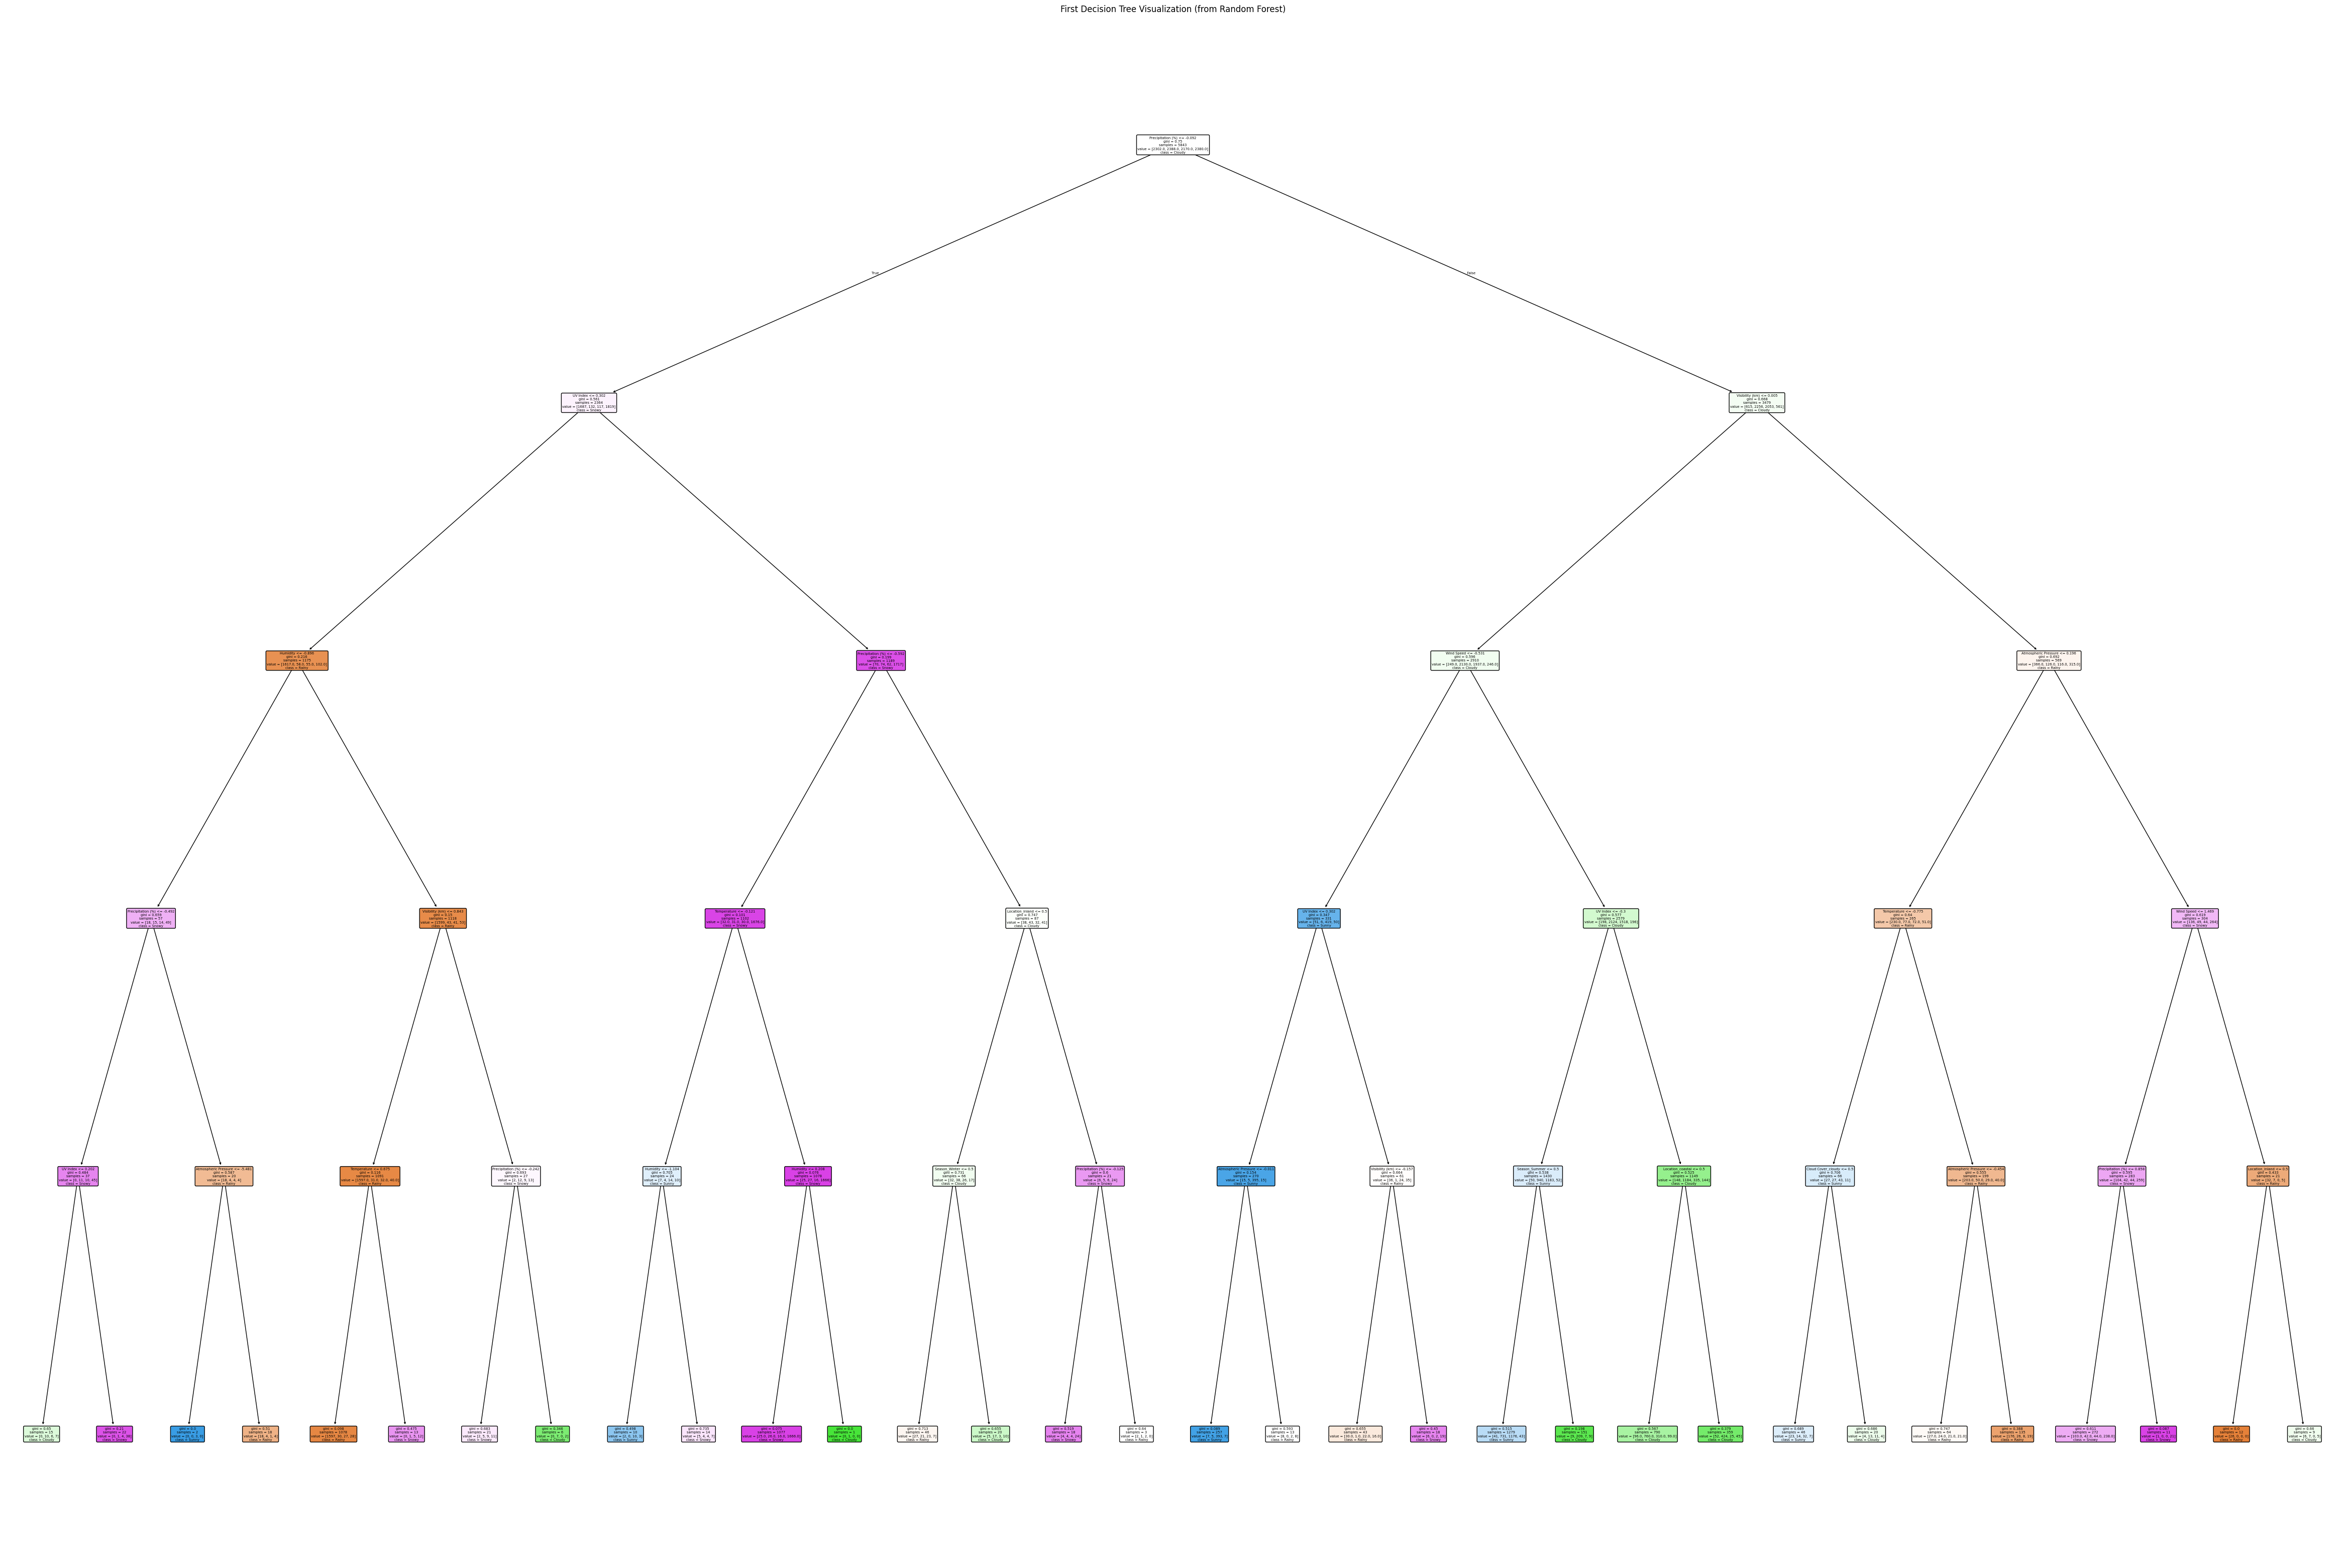

In [25]:
# Implementing Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth = 5, criterion='gini', bootstrap=True, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
precision=precision_score(y_test,y_pred_rf,average='weighted')
recall=recall_score(y_test,y_pred_rf,average='weighted')
print('-'*10,'Precision and Accuracy','-'*10)
print(f"Random Forest Classifier Precision: {precision}")
print(f"Random Forest Classifier Recall: {recall}")

# Implement MinMax Scaler
minmax=MinMaxScaler()
X_train_minmax=minmax.fit_transform(X_train)
X_test_minmax=minmax.transform(X_test)

random_forest_model.fit(X_train_minmax,y_train)
y_pred_minmax=random_forest_model.predict(X_test_minmax)
accuracy_minmax=accuracy_score(y_test,y_pred_minmax)
print(f"Decision Tree Classifier Accuracy with MinMax Scaler: {accuracy_minmax}")

# Implement Z-Score Normalization
standard=StandardScaler()
X_train_standard=standard.fit_transform(X_train)
X_test_standard=standard.transform(X_test)

random_forest_model.fit(X_train_standard,y_train)
y_pred_standard=random_forest_model.predict(X_test_standard)
accuracy_standard=accuracy_score(y_test,y_pred_standard)
print(f"Decision Tree Classifier Accuracy with Z-Score Normalization: {accuracy_standard}")

# Implement Robust Scaler
robust=RobustScaler()
X_train_robust=robust.fit_transform(X_train)
X_test_robust=robust.transform(X_test)

random_forest_model.fit(X_train_robust,y_train)
y_pred_robust=random_forest_model.predict(X_test_robust)
accuracy_robust=accuracy_score(y_test,y_pred_robust)
print(f"Decision Tree Classifier Accuracy with Robust Scaler: {accuracy_robust}")

# Visualize one of the decision trees (first tree) in the Forest
plt.figure(figsize=(60, 40))
plot_tree(random_forest_model.estimators_[0], feature_names=X.columns, class_names=['Rainy', 'Cloudy', 'Sunny', 'Snowy'], filled=True, rounded=True)
plt.title('First Decision Tree Visualization (from Random Forest)')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

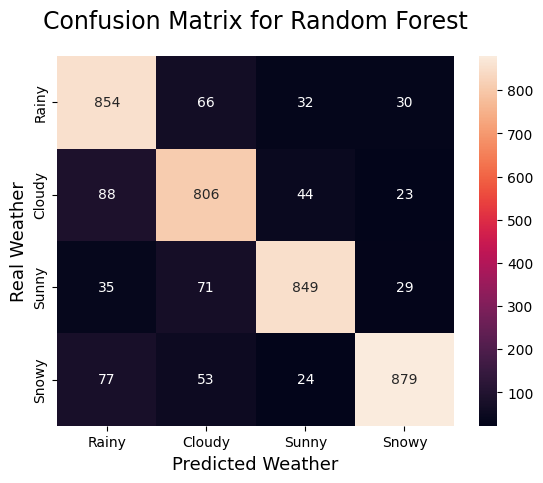

In [26]:
# Confusion Matrix for Random Forest
cm=confusion_matrix(y_test, y_pred_rf,labels=labels)
seaborn.heatmap(cm,annot=True,fmt='d', xticklabels=labels,yticklabels=labels)
plt.ylabel('Real Weather', fontsize=13)
plt.xlabel('Predicted Weather', fontsize=13)
plt.title('Confusion Matrix for Random Forest', fontsize=17, pad=20)


Logistic Regression Accuracy: 0.7818181818181819
---------- Precision and Accuracy ----------
Logistic Regrssion Classifier Precision: 0.7826873339691334
Logistic Regression Classifier Recall: 0.7818181818181819
Decision Tree Classifier Accuracy with MinMax Scaler: 0.8002525252525252
Decision Tree Classifier Accuracy with Z-Score Normalization: 0.8042929292929293
Decision Tree Classifier Accuracy with Robust Scaler: 0.8045454545454546


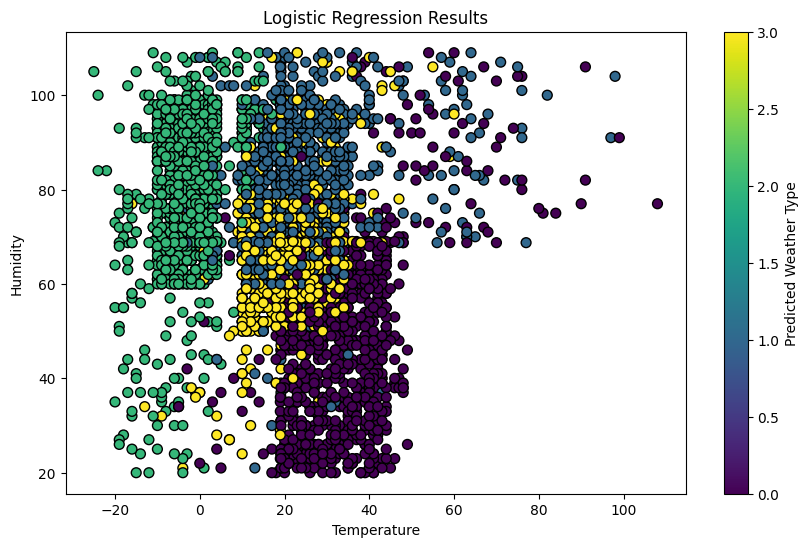

In [27]:
# Implementing Logistic Regression
lr_model=LogisticRegression()
lr_model.fit(X_train, y_train)
predictionlr=lr_model.predict(X_test)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test,predictionlr)}')

precision=precision_score(y_test,predictionlr,average='weighted')
recall=recall_score(y_test,predictionlr,average='weighted')
print('-'*10,'Precision and Accuracy','-'*10)
print(f"Logistic Regrssion Classifier Precision: {precision}")
print(f"Logistic Regression Classifier Recall: {recall}")

# Implement MinMax Scaler
minmax=MinMaxScaler()
X_train_minmax=minmax.fit_transform(X_train)
X_test_minmax=minmax.transform(X_test)

lr_model.fit(X_train_minmax,y_train)
y_pred_minmax=lr_model.predict(X_test_minmax)
accuracy_minmax=accuracy_score(y_test,y_pred_minmax)
print(f"Decision Tree Classifier Accuracy with MinMax Scaler: {accuracy_minmax}")

# Implement Z-Score Normalization
standard=StandardScaler()
X_train_standard=standard.fit_transform(X_train)
X_test_standard=standard.transform(X_test)

lr_model.fit(X_train_standard,y_train)
y_pred_standard=lr_model.predict(X_test_standard)
accuracy_standard=accuracy_score(y_test,y_pred_standard)
print(f"Decision Tree Classifier Accuracy with Z-Score Normalization: {accuracy_standard}")

# Implement Robust Scaler
robust=RobustScaler()
X_train_robust=robust.fit_transform(X_train)
X_test_robust=robust.transform(X_test)

lr_model.fit(X_train_robust,y_train)
y_pred_robust=lr_model.predict(X_test_robust)
accuracy_robust=accuracy_score(y_test,y_pred_robust)
print(f"Decision Tree Classifier Accuracy with Robust Scaler: {accuracy_robust}")

# Visualizing the result
weather_mapping={'Sunny':0,'Rainy':1,'Snowy':2,'Cloudy':3}
prediction_mapped= np.array([weather_mapping[i] for i in predictionlr])
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Temperature'], X_test['Humidity'], c=prediction_mapped, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Logistic Regression Results')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.colorbar(label='Predicted Weather Type')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix for K-Nearest Neighbors')

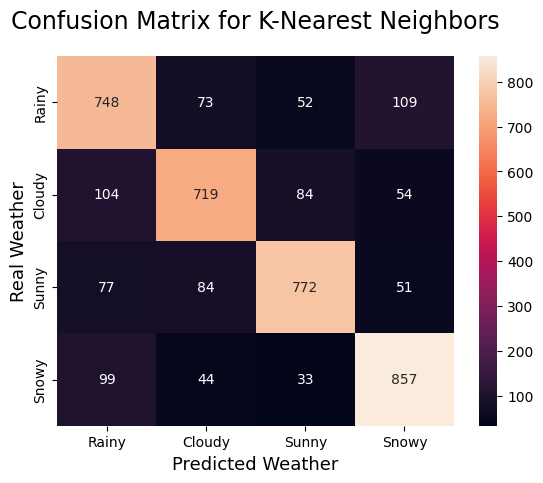

In [28]:
# Confusion Matrix for Logistic Regression
cm=confusion_matrix(y_test, predictionlr,labels=labels)
seaborn.heatmap(cm,annot=True,fmt='d', xticklabels=labels,yticklabels=labels)
plt.ylabel('Real Weather', fontsize=13)
plt.xlabel('Predicted Weather', fontsize=13)
plt.title('Confusion Matrix for K-Nearest Neighbors', fontsize=17, pad=20)


K-Nearest Neighbors Classifier Accuracy: 0.841919191919192
---------- Precision and Accuracy ----------
K-nearest neighbors Classifier Precision: 0.8443106884714336
K-nearest neighbors Classifier Recall: 0.841919191919192
Decision Tree Classifier Accuracy with MinMax Scaler: 0.8242424242424242
Decision Tree Classifier Accuracy with Z-Score Normalization: 0.8303030303030303
Decision Tree Classifier Accuracy with Robust Scaler: 0.8378787878787879


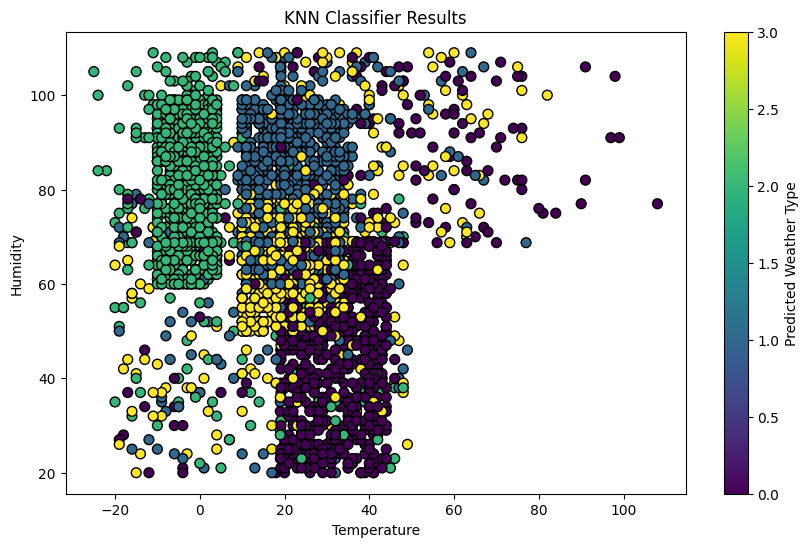

In [29]:
# Implementing K-nearest neighbors
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
predictionknn=knn.predict(X_test)
print(f'K-Nearest Neighbors Classifier Accuracy: {accuracy_score(y_test,predictionknn)}')

precision=precision_score(y_test,predictionknn,average='weighted')
recall=recall_score(y_test,predictionknn,average='weighted')
print('-'*10,'Precision and Accuracy','-'*10)
print(f"K-nearest neighbors Classifier Precision: {precision}")
print(f"K-nearest neighbors Classifier Recall: {recall}")

# Implement MinMax Scaler
minmax=MinMaxScaler()
X_train_minmax=minmax.fit_transform(X_train)
X_test_minmax=minmax.transform(X_test)

knn.fit(X_train_minmax,y_train)
y_pred_minmax=knn.predict(X_test_minmax)
accuracy_minmax=accuracy_score(y_test,y_pred_minmax)
print(f"Decision Tree Classifier Accuracy with MinMax Scaler: {accuracy_minmax}")

# Implement Z-Score Normalization
standard=StandardScaler()
X_train_standard=standard.fit_transform(X_train)
X_test_standard=standard.transform(X_test)

knn.fit(X_train_standard,y_train)
y_pred_standard=knn.predict(X_test_standard)
accuracy_standard=accuracy_score(y_test,y_pred_standard)
print(f"Decision Tree Classifier Accuracy with Z-Score Normalization: {accuracy_standard}")

# Implement Robust Scaler
robust=RobustScaler()
X_train_robust=robust.fit_transform(X_train)
X_test_robust=robust.transform(X_test)

knn.fit(X_train_robust,y_train)
y_pred_robust=knn.predict(X_test_robust)
accuracy_robust=accuracy_score(y_test,y_pred_robust)
print(f"Decision Tree Classifier Accuracy with Robust Scaler: {accuracy_robust}")

# Visualizing the result
weather_mapping={'Sunny':0,'Rainy':1,'Snowy':2,'Cloudy':3}
prediction_mapped= np.array([weather_mapping[i] for i in predictionknn])
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Temperature'], X_test['Humidity'], c=prediction_mapped, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('KNN Classifier Results')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.colorbar(label='Predicted Weather Type')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix for K-Nearest Neighbors')

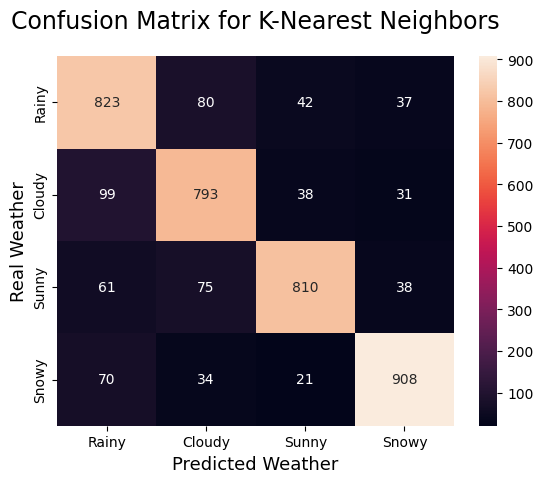

In [30]:
# Confusion Matrix for K-Nearest Neighbors
cm=confusion_matrix(y_test, predictionknn,labels=labels)
seaborn.heatmap(cm,annot=True,fmt='d', xticklabels=labels,yticklabels=labels)
plt.ylabel('Real Weather', fontsize=13)
plt.xlabel('Predicted Weather', fontsize=13)
plt.title('Confusion Matrix for K-Nearest Neighbors', fontsize=17, pad=20)


Naive Bayes Classifier Accuracy: 0.771969696969697
---------- Precision and Accuracy ----------
Naive Bayes Classifier Precision: 0.7735047909445165
Naive Bayes Classifier Recall: 0.771969696969697
Decision Tree Classifier Accuracy with MinMax Scaler: 0.771969696969697
Decision Tree Classifier Accuracy with Z-Score Normalization: 0.771969696969697
Decision Tree Classifier Accuracy with Robust Scaler: 0.771969696969697


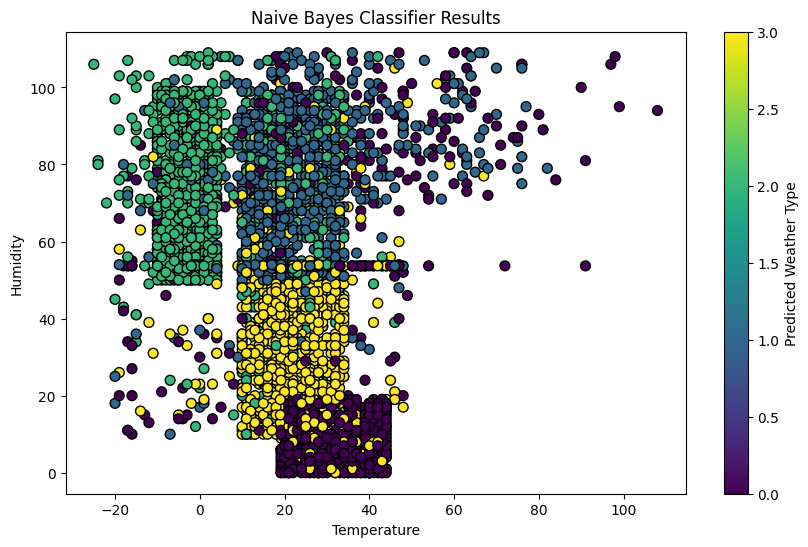

In [31]:
# Implementing Naive Bayes
naivebayes=GaussianNB()
naivebayes.fit(X_train,y_train)
predictionnb=naivebayes.predict(X_test)
print(f'Naive Bayes Classifier Accuracy: {accuracy_score(y_test,predictionnb)}')

precision=precision_score(y_test,predictionnb,average='weighted')
recall=recall_score(y_test,predictionnb,average='weighted')
print('-'*10,'Precision and Accuracy','-'*10)
print(f"Naive Bayes Classifier Precision: {precision}")
print(f"Naive Bayes Classifier Recall: {recall}")

# Implement MinMax Scaler
minmax=MinMaxScaler()
X_train_minmax=minmax.fit_transform(X_train)
X_test_minmax=minmax.transform(X_test)

naivebayes.fit(X_train_minmax,y_train)
y_pred_minmax=naivebayes.predict(X_test_minmax)
accuracy_minmax=accuracy_score(y_test,y_pred_minmax)
print(f"Decision Tree Classifier Accuracy with MinMax Scaler: {accuracy_minmax}")

# Implement Z-Score Normalization
standard=StandardScaler()
X_train_standard=standard.fit_transform(X_train)
X_test_standard=standard.transform(X_test)

naivebayes.fit(X_train_standard,y_train)
y_pred_standard=naivebayes.predict(X_test_standard)
accuracy_standard=accuracy_score(y_test,y_pred_standard)
print(f"Decision Tree Classifier Accuracy with Z-Score Normalization: {accuracy_standard}")

# Implement Robust Scaler
robust=RobustScaler()
X_train_robust=robust.fit_transform(X_train)
X_test_robust=robust.transform(X_test)

naivebayes.fit(X_train_robust,y_train)
y_pred_robust=naivebayes.predict(X_test_robust)
accuracy_robust=accuracy_score(y_test,y_pred_robust)
print(f"Decision Tree Classifier Accuracy with Robust Scaler: {accuracy_robust}")

# Visualizing the result
weather_mapping={'Sunny':0,'Rainy':1,'Snowy':2,'Cloudy':3}
prediction_mapped= np.array([weather_mapping[i] for i in predictionnb])
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Temperature'], X_test['Precipitation (%)'], c=prediction_mapped, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Naive Bayes Classifier Results')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.colorbar(label='Predicted Weather Type')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes')

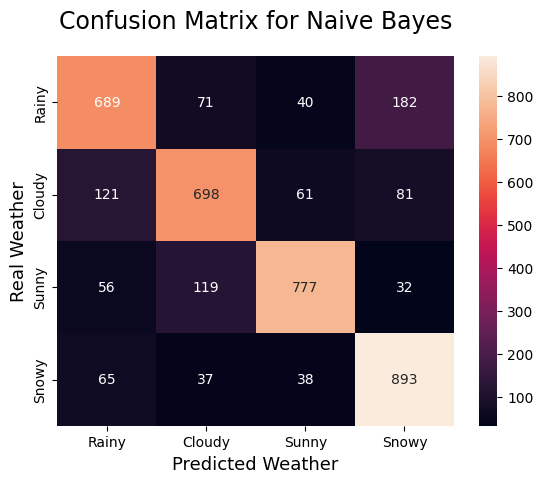

In [32]:
# Confusion Matrix for Naive Bayes
cm=confusion_matrix(y_test, predictionnb,labels=labels)
seaborn.heatmap(cm,annot=True,fmt='d', xticklabels=labels,yticklabels=labels)
plt.ylabel('Real Weather', fontsize=13)
plt.xlabel('Predicted Weather', fontsize=13)
plt.title('Confusion Matrix for Naive Bayes', fontsize=17, pad=20)


(0.0, 1.0)

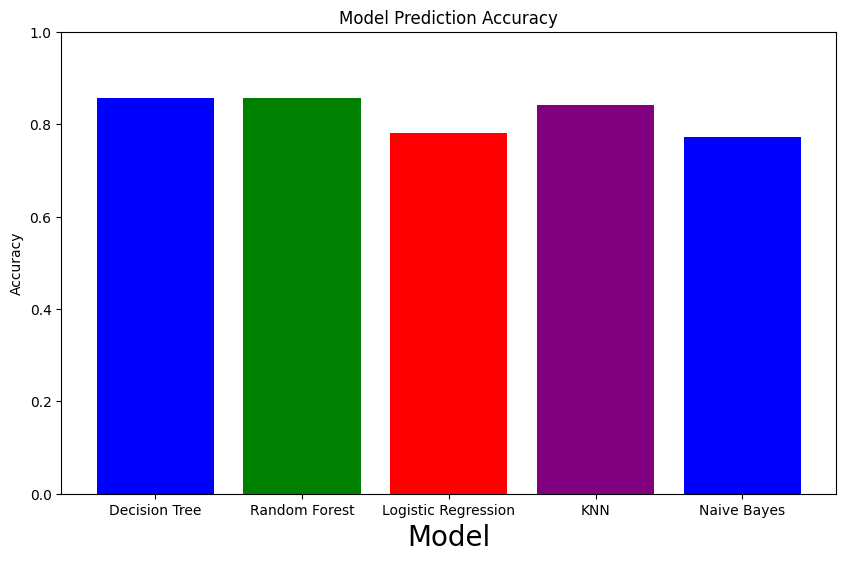

In [33]:
# Comparing prediction accuracies

accuracies = {
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Logistic Regression' : accuracy_score(y_test,predictionlr),
    'KNN': accuracy_score(y_test, predictionknn),
    'Naive Bayes': accuracy_score(y_test, predictionnb)
}

plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model',fontsize=20)
plt.ylabel('Accuracy')
plt.title('Model Prediction Accuracy')
plt.ylim(0, 1)